In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
df = pd.read_csv('E:\Data Science 2.0 Course Prectice\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [183]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [184]:
df.duplicated().sum()

0

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [186]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [187]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [188]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [189]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [190]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [191]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [192]:
from sklearn.preprocessing import OneHotEncoder

In [193]:
encoder = OneHotEncoder()

In [194]:
d = pd.DataFrame(encoder.fit_transform(df[['Geography','Gender']]).toarray().astype(int),columns=encoder.get_feature_names_out())


In [195]:
df.drop(['Geography','Gender'],axis=1,inplace=True)

In [196]:
df = pd.concat([df,d],axis=1)

In [197]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [198]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int32
Geography_Germany      int32
Geography_Spain        int32
Gender_Female          int32
Gender_Male            int32
dtype: object

In [199]:
y = df['Exited']
x = df.drop(['Exited'],axis=1)

In [200]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [201]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [202]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [203]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [204]:
scaler = StandardScaler()

In [205]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [206]:
x_train

array([[ 0.21835119,  1.91661905, -1.73168869, ..., -0.57735027,
        -0.91186722,  0.91186722],
       [ 2.05728037,  0.20210899,  1.04174968, ..., -0.57735027,
        -0.91186722,  0.91186722],
       [ 0.75860157, -0.75039661,  0.34839008, ..., -0.57735027,
         1.09665089, -1.09665089],
       ...,
       [ 0.86249588, -0.08364269, -1.3850089 , ..., -0.57735027,
         1.09665089, -1.09665089],
       [ 0.15601461,  0.3926101 ,  1.04174968, ..., -0.57735027,
        -0.91186722,  0.91186722],
       [ 0.46769752,  1.15461458, -1.3850089 , ..., -0.57735027,
        -0.91186722,  0.91186722]])

In [207]:
x_test

array([[-5.81634942e-01, -6.55146046e-01, -6.91649305e-01, ...,
        -5.77350269e-01, -9.11867223e-01,  9.11867223e-01],
       [-3.01120323e-01,  3.92610105e-01, -1.38500890e+00, ...,
        -5.77350269e-01, -9.11867223e-01,  9.11867223e-01],
       [-5.29687790e-01,  4.87860664e-01, -3.44969509e-01, ...,
         1.73205081e+00,  1.09665089e+00, -1.09665089e+00],
       ...,
       [ 1.20534708e+00, -1.32189996e+00, -1.73168869e+00, ...,
        -5.77350269e-01, -9.11867223e-01,  9.11867223e-01],
       [ 3.94971510e-01, -2.74143809e-01,  3.48390083e-01, ...,
        -5.77350269e-01,  1.09665089e+00, -1.09665089e+00],
       [-4.98519499e-01, -1.32189996e+00,  1.71028699e-03, ...,
        -5.77350269e-01,  1.09665089e+00, -1.09665089e+00]])

In [208]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [209]:
model = Sequential()

In [210]:
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\shekh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [211]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           154 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298 (1.16 KB)

 Trainable params: 298 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [212]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [213]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7189 - loss: 0.6135 - val_accuracy: 0.7933 - val_loss: 0.4951
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7931 - loss: 0.4827 - val_accuracy: 0.7980 - val_loss: 0.4500
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8098 - loss: 0.4389 - val_accuracy: 0.8187 - val_loss: 0.4337
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8182 - loss: 0.4326 - val_accuracy: 0.8253 - val_loss: 0.4252
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8238 - loss: 0.4177 - val_accuracy: 0.8273 - val_loss: 0.4179
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8178 - loss: 0.4249 - val_accuracy: 0.8347 - val_loss: 0.4102
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8243 - loss: 0.4189 - val_accuracy: 0.8367 - val_loss: 0.4009
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3911 - val_accu

In [214]:
model.layers[0].get_weights()

[array([[-0.0261327 ,  0.04467064,  0.34106252, -0.0940026 ,  0.02679309,
         -0.01650101,  0.2638471 ,  0.26265755, -0.11803252,  0.07309777,
          0.1211688 ],
        [ 0.50593436,  0.9883969 , -0.31370446, -0.43398017, -0.36707756,
         -0.1693768 , -0.90191036, -0.14220864,  0.26521525,  0.59989595,
          0.2750537 ],
        [-0.05488865,  0.20078552,  0.00931408, -0.03862253,  0.16172424,
         -0.13151012,  0.01748377,  0.03511799, -0.0731274 ,  0.09272704,
         -0.44823518],
        [-0.44745758,  0.08954024,  0.71006066, -0.3185042 , -0.18402927,
         -1.2041438 ,  0.4645459 ,  0.37301177,  0.24395631,  0.00422673,
          0.12209258],
        [-1.0713531 ,  0.05892588, -0.31806657,  0.18057817,  0.17792708,
          0.5015004 , -0.22129655,  1.091807  ,  1.1943924 , -0.4359974 ,
         -0.48428524],
        [-0.20480463,  0.24746905,  0.6445113 , -0.32553923, -0.03215424,
         -0.20234857, -0.06349421,  0.08792198, -0.12293077,  0.2617114

In [215]:
model.layers[1].get_weights()

[array([[-0.17688607, -0.7589407 , -0.04432992, -0.33413318, -0.05802691,
          0.70952845, -0.21262297,  0.1963792 , -1.7496561 ,  0.19864486,
          0.5549536 ],
        [ 0.14183858,  0.44031045, -0.41678366, -0.37842277, -0.72336966,
         -0.47723916,  0.5846975 ,  0.02528438, -2.00659   ,  1.0567873 ,
         -0.38368315],
        [ 0.5888096 ,  0.48690465,  0.47973216, -0.31276056,  0.60185015,
         -0.05555736, -0.4278776 ,  0.08078176,  0.4000417 , -0.7037525 ,
         -0.15068848],
        [ 0.02970562,  0.11732499, -0.18108787,  0.34630638,  0.6627479 ,
         -0.171505  ,  0.39620113, -0.03736417, -0.07013877, -0.8462852 ,
          0.21980977],
        [-0.07910808, -0.03921647, -0.29016137, -0.39873093,  0.51616323,
         -0.18116702, -0.33953497,  0.6248038 , -0.20997654, -0.8583844 ,
          0.2638424 ],
        [ 0.9318518 , -0.093228  , -0.78133905,  0.35170352,  0.45589805,
          0.3103357 , -0.20148921, -0.1174778 , -1.6114688 ,  0.2011483

In [216]:
y_log = model.predict(x_test)

 1/79 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [217]:
import numpy as np

In [218]:
y_pred =np.where(y_log>0.5,1,0)

In [219]:
from sklearn.metrics import accuracy_score

In [220]:
accuracy_score(y_pred,y_test)

0.8656

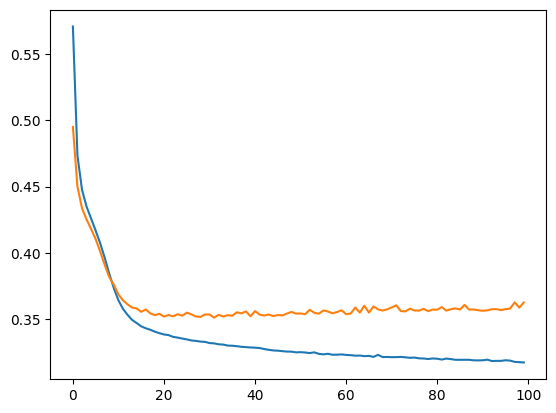

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

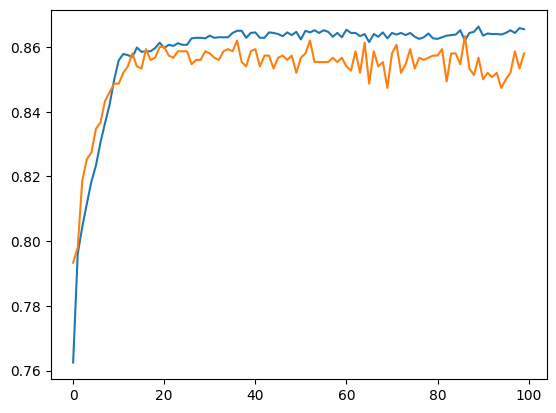

In [223]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [226]:
from sklearn.metrics import confusion_matrix,classification_report

In [225]:
confusion_matrix(y_pred,y_test)

array([[1941,  274],
       [  62,  223]], dtype=int64)

In [228]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2215
           1       0.45      0.78      0.57       285

    accuracy                           0.87      2500
   macro avg       0.71      0.83      0.75      2500
weighted avg       0.91      0.87      0.88      2500

